In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import PIL
import torchvision
import numpy as np
import pandas as pd
import tqdm
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import os


In [2]:
path = os.getcwd()

print(path)

/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8


In [111]:
root_folder = '/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8'
image_ids = pd.read_csv( root_folder +"/images.txt", sep = "\t", header = None)
image_ids.columns = ["ID", "FNAME"]
image_ids = image_ids.iloc[1: , :]
image_ids['FNAME'] = 'Formation_Images/' + image_ids['FNAME'] + '.png'
image_ids

,ID,FNAME
1,1,Formation_Images/2017_1.png
2,2,Formation_Images/2017_2.png
3,3,Formation_Images/2017_3.png
4,4,Formation_Images/2017_4.png
5,5,Formation_Images/2017_5.png
...,...,...
400,400,Formation_Images/2021_66.png
401,401,Formation_Images/2021_67.png
402,402,Formation_Images/2021_68.png
403,403,Formation_Images/2021_69.png


In [59]:
image_class = pd.read_csv( root_folder +"/image_class_labels.txt", sep = "\t", header = None)
image_class.columns = ["ID", "LABEL"]
image_class = image_class.iloc[1: , :]
image_class['CLASS'] = np.where(image_class['LABEL'].str.contains('Shotgun'), '1', '0')
image_class

,ID,LABEL,CLASS
1,1,Shotgun,1
2,2,Under Center,0
3,3,Shotgun,1
4,4,Shotgun,1
5,5,Under Center,0
...,...,...,...
400,400,Shotgun,1
401,401,Shotgun,1
402,402,Shotgun,1
403,403,Shotgun,1


In [60]:
image_splits = pd.read_csv( root_folder +"/train_test_split.txt", sep = "\t", header = None)
image_splits.columns = ["ID", "SPLIT"]
image_splits = image_splits.iloc[1: , :]
image_splits

,ID,SPLIT
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
...,...,...
400,400,0
401,401,0
402,402,0
403,403,0


In [61]:
df = pd.merge(pd.merge(image_ids,image_class,on='ID'), image_splits ,on='ID')

In [62]:
df = df.drop(columns=['LABEL'])

In [63]:
df

,ID,FNAME,CLASS,SPLIT
0,1,Formation_Images/2017_1.png,1,1
1,2,Formation_Images/2017_2.png,0,1
2,3,Formation_Images/2017_3.png,1,1
3,4,Formation_Images/2017_4.png,1,1
4,5,Formation_Images/2017_5.png,0,1
...,...,...,...,...
399,400,Formation_Images/2021_66.png,1,0
400,401,Formation_Images/2021_67.png,1,0
401,402,Formation_Images/2021_68.png,1,0
402,403,Formation_Images/2021_69.png,1,0


In [64]:
df.dtypes

ID       object
FNAME    object
CLASS    object
SPLIT    object
dtype: object

In [65]:
df["SPLIT"] = pd.to_numeric(df["SPLIT"])

In [66]:
train_df = df.loc[df["SPLIT"] == 1]

print(train_df.shape)

train_df.head(10)

(40, 4)


,ID,FNAME,CLASS,SPLIT
0,1,Formation_Images/2017_1.png,1,1
1,2,Formation_Images/2017_2.png,0,1
2,3,Formation_Images/2017_3.png,1,1
3,4,Formation_Images/2017_4.png,1,1
4,5,Formation_Images/2017_5.png,0,1
5,6,Formation_Images/2017_6.png,0,1
6,7,Formation_Images/2017_7.png,0,1
7,8,Formation_Images/2017_8.png,0,1
8,9,Formation_Images/2017_9.png,0,1
9,10,Formation_Images/2017_10.png,1,1


In [67]:
test_df = df.loc[df["SPLIT"] == 0]

print(test_df.shape)
test_df.head(10)

(364, 4)


,ID,FNAME,CLASS,SPLIT
40,41,Formation_Images/2017_41.png,1,0
41,42,Formation_Images/2017_42.png,1,0
42,43,Formation_Images/2017_43.png,0,0
43,44,Formation_Images/2017_44.png,0,0
44,45,Formation_Images/2017_45.png,1,0
45,46,Formation_Images/2017_46.png,0,0
46,47,Formation_Images/2017_47.png,1,0
47,48,Formation_Images/2017_48.png,1,0
48,49,Formation_Images/2017_49.png,1,0
49,50,Formation_Images/2017_50.png,1,0


In [68]:
#Trying something
test_df = test_df.drop(columns=['CLASS'])

In [69]:
test_df['FNAME'][41]

'Formation_Images/2017_42.png'

In [70]:
train_path = "/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/train"
if not os.path.exists(train_path):
    os.makedirs(train_path)

test_path = "/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/test"
if not os.path.exists(test_path):
    os.makedirs(test_path)

In [71]:
for _,row in train_df.iterrows():
  path = "/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/" + row["FNAME"]

  label = "train/" + row["FNAME"].split('.')[1].split('/')[0]

  if not os.path.exists(label):
    os.makedirs(label)

  target = label + '/'+ row["FNAME"].split('/')[-1]

  shutil.move(path, target)

In [72]:
for _,row in test_df.iterrows():
  path = "/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/" + row["FNAME"]

  label = "test/" + row["FNAME"].split('.')[1].split('/')[0]

  if not os.path.exists(label):
    os.makedirs(label)

  target = label + '/'+ row["FNAME"].split('/')[-1]

  shutil.move(path, target)

In [73]:
from torchvision.transforms.transforms import CenterCrop


class SquarePad:
    def __call__(self, image):
        max_wh = max(image.size)
        p_left, p_top = [(max_wh - s) // 2 for s in image.size]
        p_right, p_bottom = [max_wh - (s+pad) for s, pad in zip(image.size, [p_left, p_top])]
        padding = (p_left, p_top, p_right, p_bottom)
        return torchvision.transforms.functional.pad(image, padding, 0, 'constant')


mean = [0.4829, 0.4908, 0.4228]
std = [0.2297, 0.2252, 0.2601]

transform = torchvision.transforms.Compose(
    [
      SquarePad(),
      torchvision.transforms.RandomHorizontalFlip(p = 0.5),
      torchvision.transforms.RandomVerticalFlip(p = 0.5),
      torchvision.transforms.Resize(224),
      #torchvision.transforms.CenterCrop(224),
      #torchvision.transforms.RandomResizedCrop(224, (0.8, 1.0)),
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize(
          mean=mean,
          std=std
          )
    ]
)

train = torchvision.datasets.ImageFolder(
    root = '/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/train/',
    transform = transform
)


train_loader = torch.utils.data.DataLoader(
    train, 
    batch_size= 32,
    shuffle=True
)

test = torchvision.datasets.ImageFolder(
    root = '/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/test/',
    transform = transform
)


test_loader = torch.utils.data.DataLoader(
    test, 
    batch_size= 32,
    shuffle=True
)

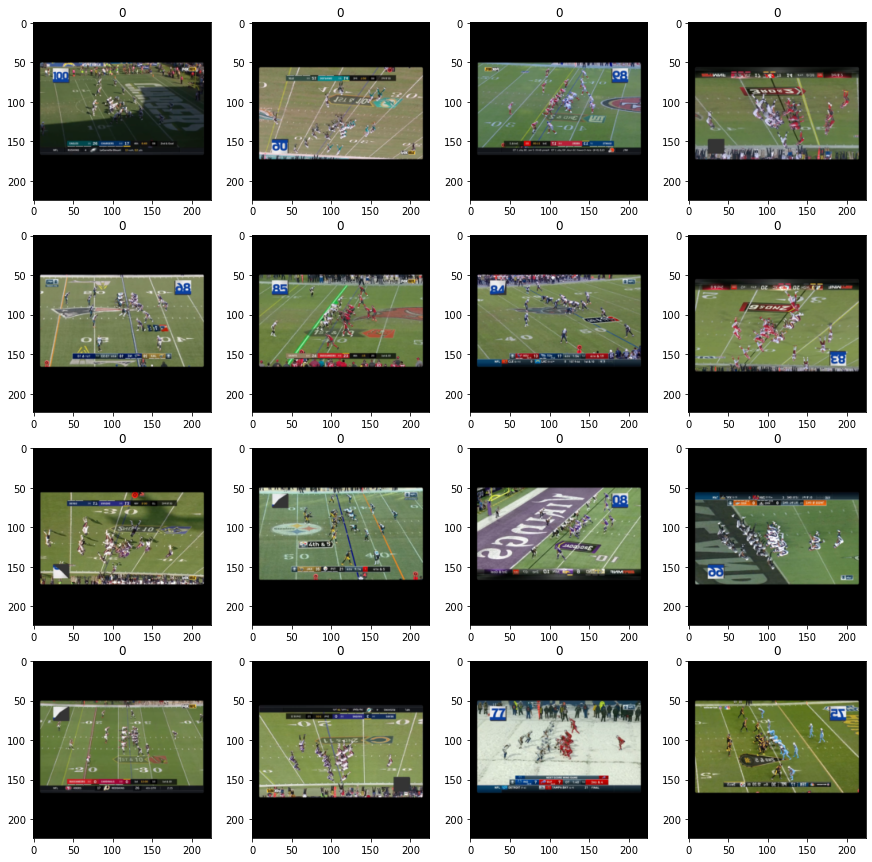

In [74]:
fig, axes = plt.subplots(4,4,figsize= (15,15))

for i in range(16):

  img = train[i][0].numpy().transpose(1, 2, 0)
  img = np.clip((std * img) + mean, 0, 1)
  axes.flat[i].imshow(img)
  axes.flat[i].set_title(str(train[i][1]))

# Follow aspect ratio of either 1:1 or 1.68:1 (8.5, 4.75/5)
fig.savefig('/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/Analysis/train_image_transformations.jpg', dpi=500, bbox_inches='tight')  
fig.savefig('/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/Analysis/train_image_transformations.pdf', dpi=500, bbox_inches='tight')  
plt.show()

In [75]:
class CustomVGG(nn.Module):

  def __init__(self, num_classes = 200):
    super().__init__()

    self.features = nn.Sequential(
      nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(64),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(64),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
      nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(128),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(128),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
      nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(256),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(256),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(256),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
      nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(512),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(512),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(512),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
      nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(512),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(512),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
      nn.BatchNorm2d(512),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )

    self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7, 7))

    self.classifier = nn.Sequential(
      nn.Dropout(p=0.5, inplace= False),
      nn.Linear(in_features=25088, out_features=4096, bias=True),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5, inplace= False),
      nn.Linear(in_features=4096, out_features=4096, bias=True),
      nn.ReLU(inplace=True),
      nn.Linear(in_features=4096, out_features=num_classes, bias=True)
    )

  def forward(self, x):

    x = self.features(x)
    x = self.avgpool(x)
    x = x.reshape(x.size(0), -1)
    x = self.classifier(x)

    return x

#if torch.cuda.is_available():
#  cuda = True


VGGscratch = CustomVGG(num_classes=200)




print(VGGscratch)

CustomVGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(12

In [76]:
optimizer = optim.SGD(params = VGGscratch.parameters(),   lr= 1e-3, momentum= 0.9 )
#scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
criterion = nn.CrossEntropyLoss()

In [77]:
EPOCHS = 5 # 50

train_loss = [np.nan]
train_accuracy = [np.nan]
test_loss = [np.nan]

VGGscratch.train()


pbar = tqdm.tqdm(total = EPOCHS, position= 0, leave = True)
pbar.set_description("EPOCH 1: Training Loss: NA, ")


for epoch in range(EPOCHS):
  
  total, correct, running_loss = 0, 0, 0

  for batch_idx, (data,target) in enumerate(train_loader):

    VGGscratch.train()



    optimizer.zero_grad()

    out = VGGscratch(data)

    loss = criterion(out, target)
    loss.backward()
    optimizer.step()


    current_loss = loss.cpu().data.item()
    running_loss += current_loss


    _, predicted = out.max(1)
    total += target.size(0)
    correct += predicted.eq(target).sum().cpu().item()
          


    pbar.set_description(f"EPOCH {epoch+1}\t Batch Loss: {current_loss:.3f}\t  Epoch Loss: {train_loss[-1]:.3f}\t Train Acc: {train_accuracy[-1]:.3f}\t Test Loss: {test_loss[-1]:.3f}\t")


  test_running_loss = 0
  VGGscratch.eval()


  with torch.no_grad():


    for batch_idx, (data,target) in enumerate(test_loader):


      out = VGGscratch(data)

      loss = criterion(out, target)

      test_running_loss += loss.cpu().data.item()


    LTest = test_running_loss/len(test_loader)


  
  LTrain=running_loss/len(train_loader)
  accu=100.*correct/total
    
  train_accuracy.append(accu)
  train_loss.append(LTrain)
  test_loss.append(LTest)

  pbar.set_description(f"EPOCH {epoch+1}\t Batch Loss: {current_loss:.3f}\t  Epoch Loss: {train_loss[-1]:.3f}\t Train Acc: {train_accuracy[-1]:.3f}\t Test Loss: {test_loss[-1]:.3f}\t")

  pbar.update()

del train_accuracy[0]
del train_loss[0]
del test_loss[0]

EPOCH 5	 Batch Loss: 0.000	  Epoch Loss: 0.000	 Train Acc: 100.000	 Test Loss: 3.270	: 100%|██████████| 5/5 [33:13<00:00, 399.23s/it]

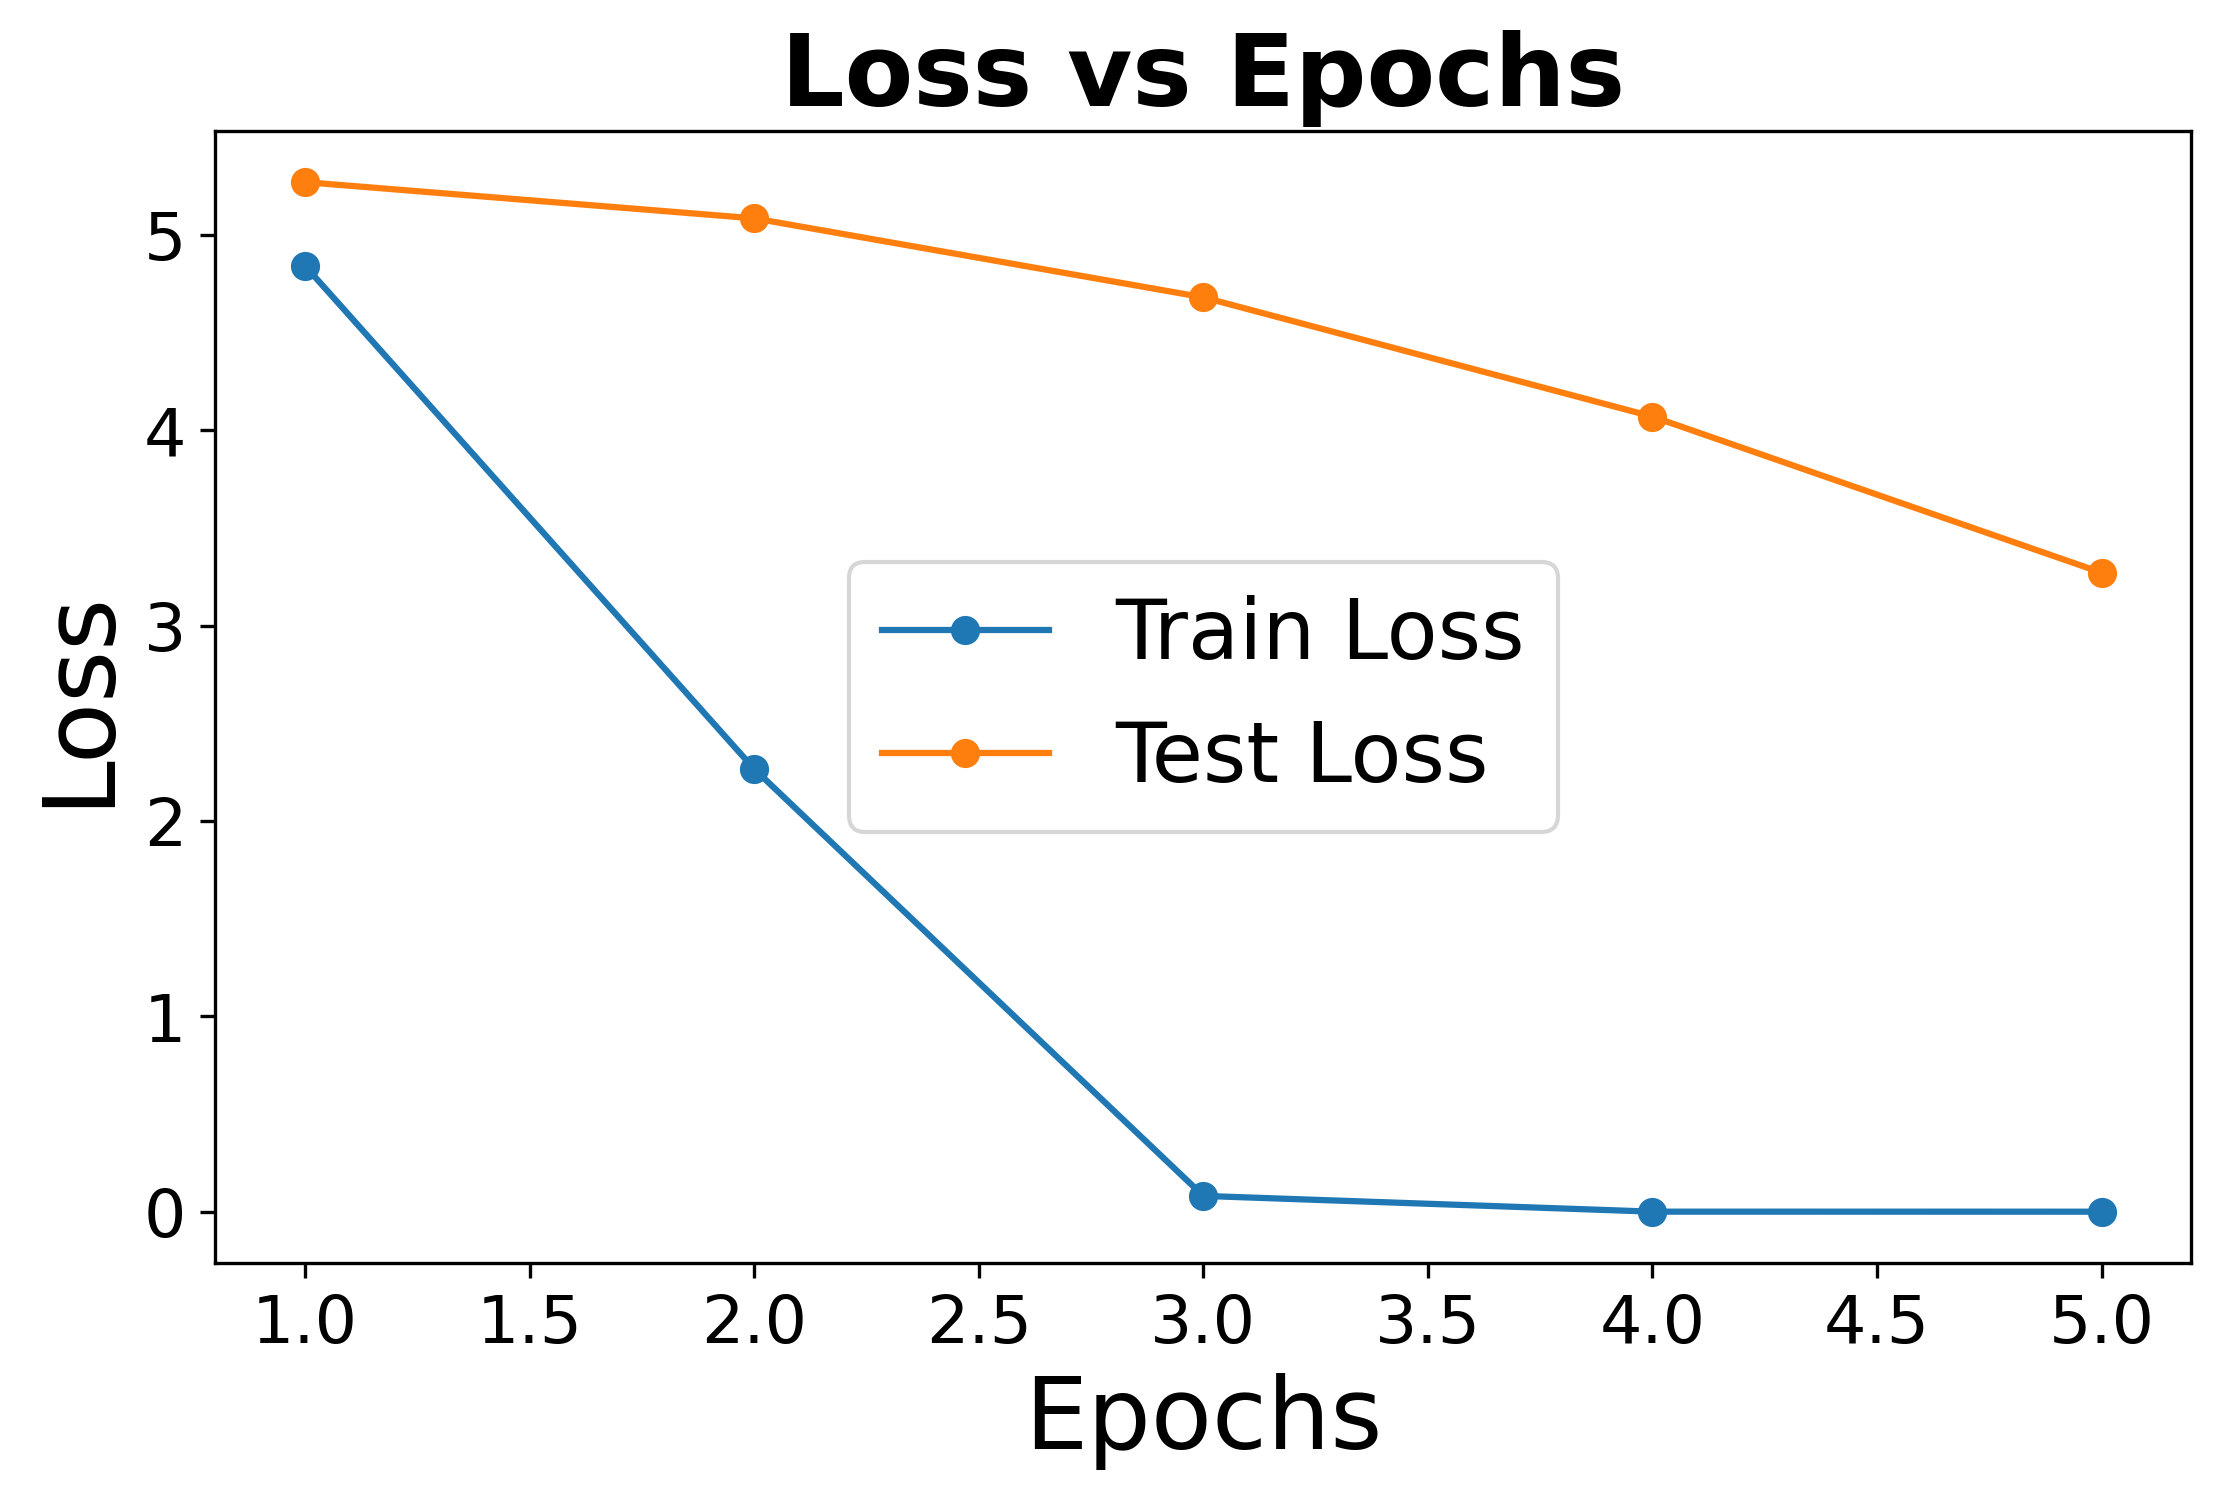

In [78]:
import seaborn as sns

from matplotlib import RcParams


myrcparams = RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 0.0,
          'figure.facecolor': 'white',
          'font.family': ['serif'],
          'grid.color': 'white',
          'grid.linestyle': '--',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': 'round',
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direction': 'out',
          'ytick.major.size': 0.0,
          'ytick.minor.size': 0.0})

plt.style.library['seaborn-whitegrid']
RcParams.update(myrcparams)


fig, ax = plt.subplots(figsize =(8.5,5), dpi=300)

x = np.arange(1,len(train_loss)+1)

ax.plot(x, train_loss, '-o', label = "Train Loss", linewidth = 1.5)
ax.plot(x, test_loss, '-o', label = "Test Loss", linewidth = 1.5)

ax.set_xlabel("Epochs", fontsize = 24)
ax.set_ylabel("Loss", fontsize = 24)

ax.tick_params(
    axis = 'both',
    labelsize = 16
)
ax.legend(fontsize = 20)
ax.set_title("Loss vs Epochs", fontsize = 24, fontweight = 'bold')

plt.savefig("Loss vs Epochs.jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig("Loss vs Epochs.pdf", dpi = 300, bbox_inches = 'tight')
plt.show()

In [80]:
correct = 0
total = 0

VGGscratch.eval()

with torch.no_grad():
    for batch_idx, (data,target) in enumerate(train_loader):
        
        
        out = VGGscratch(data)


        for _,i in enumerate(out):
            
            if target[_].cpu().item() in torch.argsort(i)[-5:].cpu().numpy():
                correct += 1
            total += 1

correct/total

1.0

In [79]:
correct = 0
total = 0

VGGscratch.eval()

with torch.no_grad():
    for batch_idx, (data,target) in enumerate(test_loader):
        
        out = VGGscratch(data)


        for _,i in enumerate(out):

            if torch.argmax(i) == target[_]:
                correct += 1
            total += 1

correct/total

1.0

In [81]:
VGGpretrained = torchvision.models.vgg16(pretrained= True)

# for p in list(VGGpretrained.parameters())[:-6]:
#   p.requires_grad = False

VGGpretrained.classifier[6] = nn.Linear(in_features=4096, out_features=200, bias=True)

cuda = torch.cuda.is_available()

if cuda:
 VGGpretrained.cuda()

print(VGGpretrained)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [83]:
optimizer = optim.SGD(params = VGGpretrained.parameters(),   lr= 1e-3, momentum= 0.9 )
#scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
criterion = nn.CrossEntropyLoss()

In [84]:
EPOCHS = 5 #50

train_loss = [np.nan]
train_accuracy = [np.nan]
test_accuracy = [np.nan]
test_loss = [np.nan]
best_test_acc = -np.inf
best_snapshot_path = None

VGGpretrained.train()


pbar = tqdm.tqdm(total = EPOCHS, position= 0, leave = True)
pbar.set_description("EPOCH 1: Training Loss: NA, ")


for epoch in range(EPOCHS):
  
  total, correct, running_loss = 0, 0, 0

  for batch_idx, (data,target) in enumerate(train_loader):

    VGGpretrained.train()

    if cuda:
      data, target = data.cuda(), target.cuda()

    optimizer.zero_grad()

    out = VGGpretrained(data)

    loss = criterion(out, target)
    loss.backward()
    optimizer.step()


    current_loss = loss.cpu().data.item()
    running_loss += current_loss


    _, predicted = out.max(1)
    total += target.size(0)
    correct += predicted.eq(target).sum().cpu().item()
          
    #scheduler.step()

    pbar.set_description(f"EPOCH {epoch+1}\t Batch Loss: {current_loss:.3f}\t  Epoch Loss: {train_loss[-1]:.3f}\t Train Acc: {train_accuracy[-1]:.3f}%\t Test Loss: {test_loss[-1]:.3f}\t Test Acc: {test_accuracy[-1]:.3f}%\t")


  test_total, test_correct, test_running_loss = 0, 0, 0
  VGGpretrained.eval()


  with torch.no_grad():


    for batch_idx, (data,target) in enumerate(test_loader):

      if cuda:
        data, target = data.cuda(), target.cuda()

      out = VGGpretrained(data)

      loss = criterion(out, target)

      test_running_loss += loss.cpu().data.item()

      _, predicted = out.max(1)
      test_total += target.size(0)
      test_correct += predicted.eq(target).sum().cpu().item()


    test_accu=100.*test_correct/test_total
    LTest = test_running_loss/len(test_loader)

    if test_accu > best_test_acc:
      best_test_acc = test_accu

      if best_snapshot_path is not None:
        os.remove(best_snapshot_path)
      
      best_snapshot_path = os.path.join(f'VGG_ep={epoch + 1}_acc={best_test_acc:.2f}.pt')
      torch.save(VGGpretrained.state_dict(), best_snapshot_path)

  
  LTrain=running_loss/len(train_loader)
  accu=100.*correct/total
    
  train_accuracy.append(accu)
  test_accuracy.append(test_accu)
  train_loss.append(LTrain)
  test_loss.append(LTest)

  pbar.set_description(f"EPOCH {epoch+1}\t Batch Loss: {current_loss:.3f}\t  Epoch Loss: {train_loss[-1]:.3f}\t Train Acc: {train_accuracy[-1]:.3f}%\t Test Loss: {test_loss[-1]:.3f}\t Test Acc: {test_accuracy[-1]:.3f}%\t")

  pbar.update()

del train_accuracy[0]
del test_accuracy[0]
del train_loss[0]
del test_loss[0]

EPOCH 5	 Batch Loss: 0.000	  Epoch Loss: 0.000	 Train Acc: 100.000%	 Test Loss: 0.000	 Test Acc: 100.000%	: 100%|██████████| 5/5 [45:14<00:00, 546.07s/it]

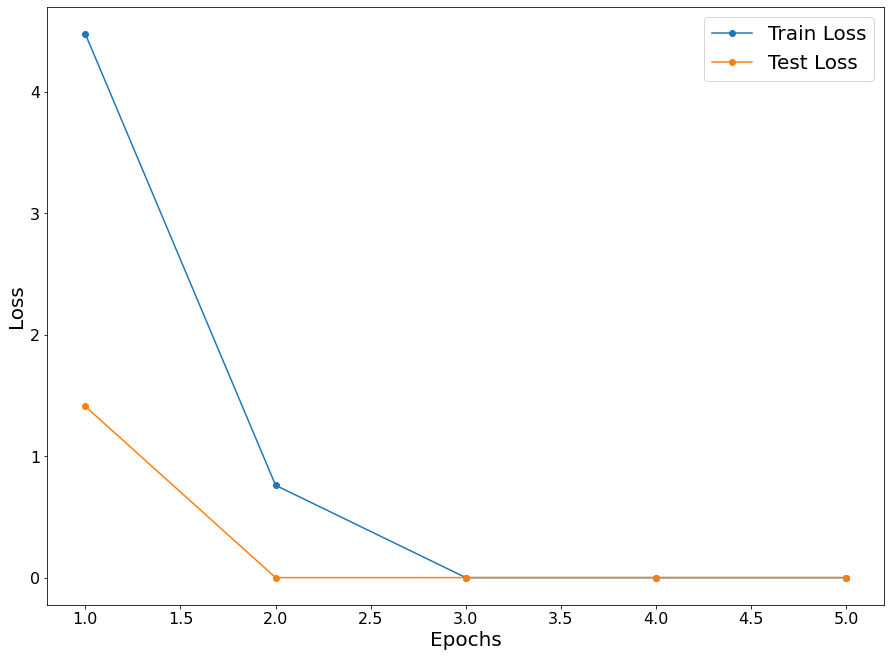

In [85]:
fig, ax = plt.subplots(figsize =(15,11))

x = np.arange(1,len(train_loss)+1)

ax.plot(x, train_loss, '-o', label = "Train Loss")
ax.plot(x, test_loss, '-o', label = "Test Loss")

ax.set_xlabel("Epochs", fontsize = 20)
ax.set_ylabel("Loss", fontsize = 20)

ax.tick_params(
    axis = 'both',
    labelsize = 16
)
ax.legend(fontsize = 20)

plt.show()

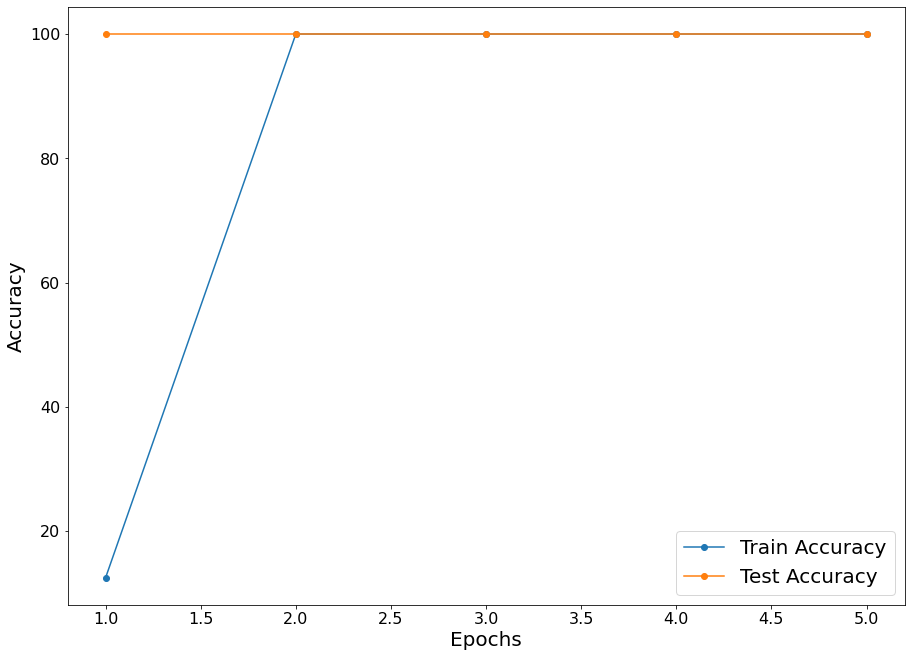

In [86]:
fig, ax = plt.subplots(figsize =(15,11))

x = np.arange(1,len(train_accuracy)+1)

ax.plot(x, train_accuracy, '-o', label = "Train Accuracy")
ax.plot(x, test_accuracy, '-o', label = "Test Accuracy")

ax.set_xlabel("Epochs", fontsize = 20)
ax.set_ylabel("Accuracy", fontsize = 20)

ax.tick_params(
    axis = 'both',
    labelsize = 16
)
ax.legend(fontsize = 20)

plt.show()

In [87]:
VGGpretrained.load_state_dict(torch.load(best_snapshot_path))

<All keys matched successfully>

In [89]:
correct = 0
total = 0

VGGpretrained.eval()

with torch.no_grad():
    for batch_idx, (data,target) in enumerate(train_loader):
        if cuda:
          data, target = data.cuda(), target.cuda()
        
        out = VGGpretrained(data)


        for _,i in enumerate(out):

            if torch.argmax(i) == target[_]:
                correct += 1
            total += 1

correct/total

1.0

In [90]:
correct = 0
total = 0

VGGpretrained.eval()

with torch.no_grad():
    for batch_idx, (data,target) in enumerate(test_loader):
        if cuda:
          data, target = data.cuda(), target.cuda()
        
        out = VGGpretrained(data)


        for _,i in enumerate(out):
            
            if target[_].cpu().item() in torch.argsort(i)[-5:].cpu().numpy():
                correct += 1
            total += 1

correct/total

1.0

 ## Evaluating a Convolutional Neural Network
 ### Fine-tuning a pre-trained model to achieve ~80% top-1 accuracy and ~95% top-5 accuracy on a dataset with 200 classes and only 60 examples per class
 ### Viewing our model's mistakes
 ### Visualizing our data in lower dimensions with PCA and t-SNE
 ### Viewing the learned weights of our model

In [100]:
from torchvision.transforms.transforms import CenterCrop


class SquarePad:
    def __call__(self, image):
        max_wh = max(image.size)
        p_left, p_top = [(max_wh - s) // 2 for s in image.size]
        p_right, p_bottom = [max_wh - (s+pad) for s, pad in zip(image.size, [p_left, p_top])]
        padding = (p_left, p_top, p_right, p_bottom)
        return torchvision.transforms.functional.pad(image, padding, 0, 'constant')


mean = [0.4829, 0.4908, 0.4228]
std = [0.2297, 0.2252, 0.2601]

transform = torchvision.transforms.Compose(
    [
      SquarePad(),
      torchvision.transforms.RandomHorizontalFlip(p = 0.5),
      torchvision.transforms.RandomVerticalFlip(p = 0.5),
      torchvision.transforms.Resize(448),
      #torchvision.transforms.CenterCrop(224),
      #torchvision.transforms.RandomResizedCrop(224, (0.8, 1.0)),
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize(
          mean=mean,
          std=std
          )
    ]
)

train = torchvision.datasets.ImageFolder(
    root = '/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/train',
    transform = transform
)


train_loader = torch.utils.data.DataLoader(
    train, 
    batch_size= 32,
    shuffle=True
)

test = torchvision.datasets.ImageFolder(
    root = '/Users/leonardmarshall/Georgetown_Coursework/677/Labs/Lab 8/test',
    transform = transform
)


test_loader = torch.utils.data.DataLoader(
    test, 
    batch_size= 32,
    shuffle=True
)

In [101]:
class VGGalter(nn.Module):

  def __init__(self):
    super().__init__()

    self.VGG =  torchvision.models.vgg16(pretrained= True)
    self.VGG.features[30] = nn.MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)

    self.FC4 = nn.Sequential(
        nn.ReLU(inplace = True),
        nn.Dropout(p = 0.5),
        nn.Linear(in_features=1000, out_features=200, bias=True)
    )


  def forward(self, x):

    x = self.VGG.features(x)
    x = self.VGG.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.VGG.classifier(x)
    
    x = self.FC4(x)

    return x


ComplexVGG = VGGalter()


cuda = torch.cuda.is_available()


if cuda:
 ComplexVGG.cuda()

print(ComplexVGG)

VGGalter(
  (VGG): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

In [102]:
optimizer = optim.SGD(params = ComplexVGG.parameters(),   lr= 1e-3, momentum= 0.9 )
#scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
criterion = nn.CrossEntropyLoss()

In [103]:
EPOCHS = 5 #50

train_loss = [np.nan]
train_accuracy = [np.nan]
test_accuracy = [np.nan]
test_loss = [np.nan]
best_test_acc = -np.inf
best_snapshot_path = None

ComplexVGG.train()


pbar = tqdm.tqdm(total = EPOCHS, position= 0, leave = True)
pbar.set_description("EPOCH 1: Training Loss: NA, ")


for epoch in range(EPOCHS):
  
  total, correct, running_loss = 0, 0, 0

  for batch_idx, (data,target) in enumerate(train_loader):

    ComplexVGG.train()

#    if cuda:
#      data, target = data.cuda(), target.cuda()

    optimizer.zero_grad()

    out = ComplexVGG(data)

    loss = criterion(out, target)
    loss.backward()
    optimizer.step()


    current_loss = loss.cpu().data.item()
    running_loss += current_loss


    _, predicted = out.max(1)
    total += target.size(0)
    correct += predicted.eq(target).sum().cpu().item()
          
    #scheduler.step()

    pbar.set_description(f"EPOCH {epoch+1}\t Batch Loss: {current_loss:.3f}\t  Epoch Loss: {train_loss[-1]:.3f}\t Train Acc: {train_accuracy[-1]:.3f}%\t Test Loss: {test_loss[-1]:.3f}\t Test Acc: {test_accuracy[-1]:.3f}%\t")


  test_total, test_correct, test_running_loss = 0, 0, 0
  ComplexVGG.eval()


  with torch.no_grad():


    for batch_idx, (data,target) in enumerate(test_loader):

#      if cuda:
#        data, target = data.cuda(), target.cuda()

      out = ComplexVGG(data)

      loss = criterion(out, target)

      test_running_loss += loss.cpu().data.item()

      _, predicted = out.max(1)
      test_total += target.size(0)
      test_correct += predicted.eq(target).sum().cpu().item()


    test_accu=100.*test_correct/test_total
    LTest = test_running_loss/len(test_loader)

    if test_accu > best_test_acc:
      best_test_acc = test_accu

      if best_snapshot_path is not None:
        os.remove(best_snapshot_path)
      
      best_snapshot_path = os.path.join(f'VGGCustom_ep={epoch + 1}_acc={best_test_acc:.2f}.pt')
      torch.save(ComplexVGG.state_dict(), best_snapshot_path)

  
  LTrain=running_loss/len(train_loader)
  accu=100.*correct/total
    
  train_accuracy.append(accu)
  test_accuracy.append(test_accu)
  train_loss.append(LTrain)
  test_loss.append(LTest)

  pbar.set_description(f"EPOCH {epoch+1}\t Batch Loss: {current_loss:.3f}\t  Epoch Loss: {train_loss[-1]:.3f}\t Train Acc: {train_accuracy[-1]:.3f}%\t Test Loss: {test_loss[-1]:.3f}\t Test Acc: {test_accuracy[-1]:.3f}%\t")

  pbar.update()

del train_accuracy[0]
del test_accuracy[0]
del train_loss[0]
del test_loss[0]

EPOCH 5	 Batch Loss: 0.000	  Epoch Loss: 0.000	 Train Acc: 100.000%	 Test Loss: 0.000	 Test Acc: 100.000%	: 100%|██████████| 5/5 [2:10:58<00:00, 1549.28s/it]  

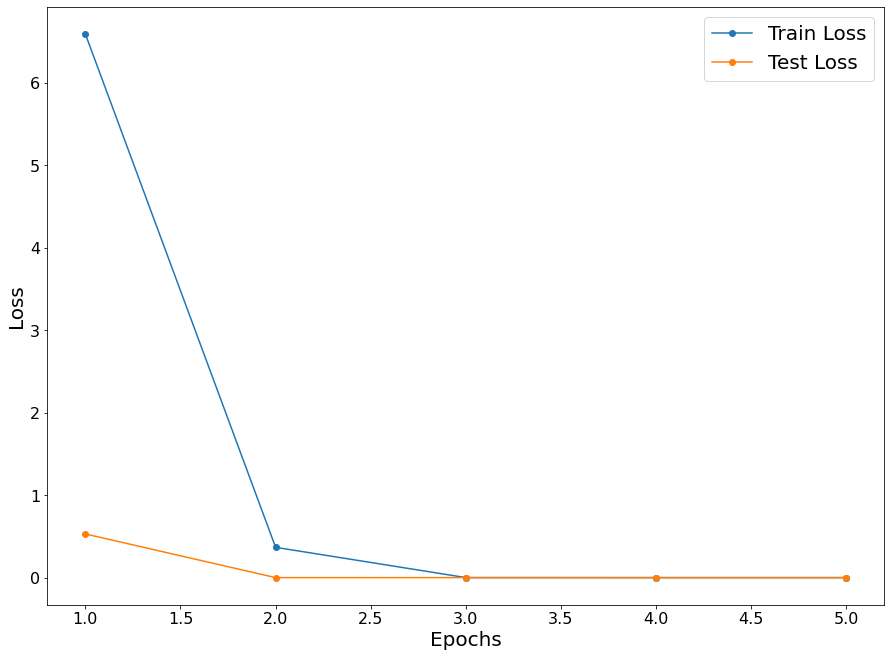

In [104]:
fig, ax = plt.subplots(figsize =(15,11))

x = np.arange(1,len(train_loss)+1)

ax.plot(x, train_loss, '-o', label = "Train Loss")
ax.plot(x, test_loss, '-o', label = "Test Loss")

ax.set_xlabel("Epochs", fontsize = 20)
ax.set_ylabel("Loss", fontsize = 20)

ax.tick_params(
    axis = 'both',
    labelsize = 16
)
ax.legend(fontsize = 20)

plt.show()

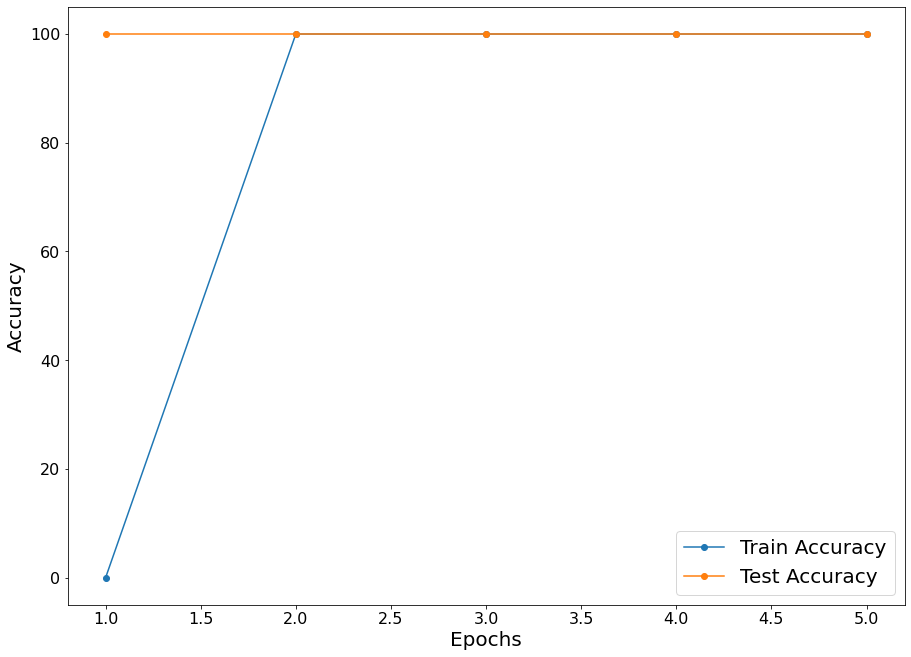

In [105]:
fig, ax = plt.subplots(figsize =(15,11))

x = np.arange(1,len(train_accuracy)+1)

ax.plot(x, train_accuracy, '-o', label = "Train Accuracy")
ax.plot(x, test_accuracy, '-o', label = "Test Accuracy")

ax.set_xlabel("Epochs", fontsize = 20)
ax.set_ylabel("Accuracy", fontsize = 20)

ax.tick_params(
    axis = 'both',
    labelsize = 16
)
ax.legend(fontsize = 20)

plt.show()

In [106]:
ComplexVGG.load_state_dict(torch.load(best_snapshot_path))

<All keys matched successfully>

In [107]:
correct = 0
total = 0

ComplexVGG.eval()

with torch.no_grad():
    for batch_idx, (data,target) in enumerate(train_loader):
        if cuda:
          data, target = data.cuda(), target.cuda()
        
        out = ComplexVGG(data)


        for _,i in enumerate(out):

            if torch.argmax(i) == target[_]:
                correct += 1
            total += 1

correct/total

1.0

In [108]:
correct = 0
total = 0

ComplexVGG.eval()

with torch.no_grad():
    for batch_idx, (data,target) in enumerate(test_loader):
        if cuda:
          data, target = data.cuda(), target.cuda()
        
        out = ComplexVGG(data)


        for _,i in enumerate(out):
            
            if target[_].cpu().item() in torch.argsort(i)[-5:].cpu().numpy():
                correct += 1
            total += 1

correct/total

1.0

In [109]:
idx_to_class = inv_map = {v: k for k, v in test.class_to_idx.items()}

correct = []
pred = []

ComplexVGG.eval()

with torch.no_grad():
    for batch_idx, (data,target) in enumerate(test_loader):
        if cuda:
          data, target = data.cuda(), target.cuda()
        
        out = ComplexVGG(data)


        for _,i in enumerate(out):

            pred.append(torch.argmax(i).cpu().item())
            correct.append(target[_].cpu().item())

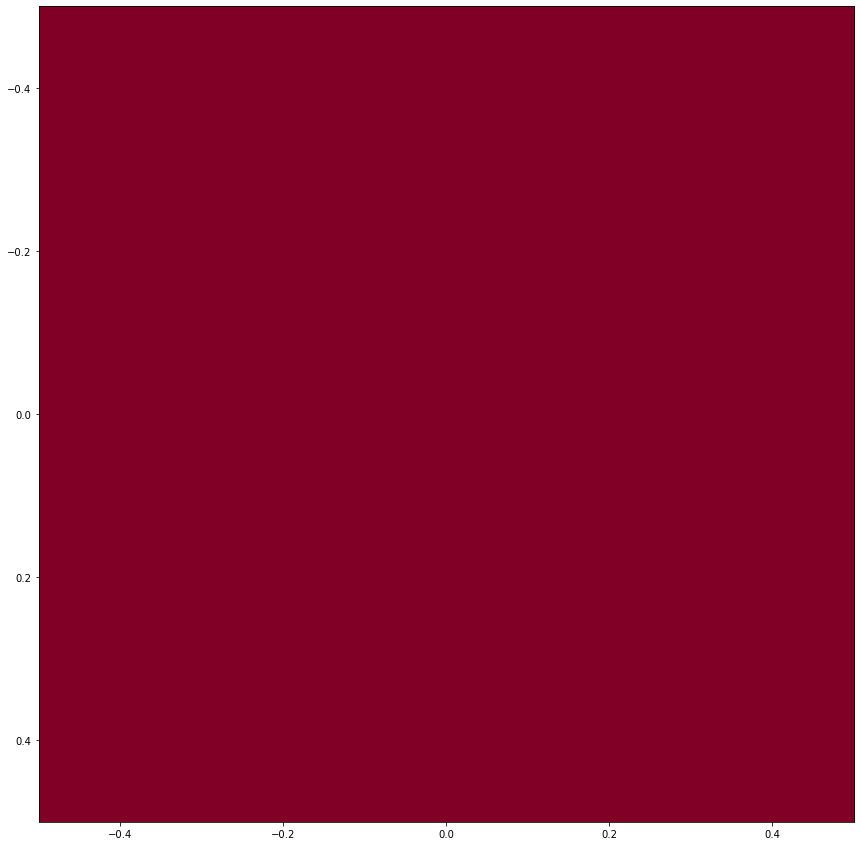

In [110]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_pred= pred, y_true = correct)

fig,ax = plt.subplots(figsize = (15,15))

plt.imshow(conf, interpolation='none', cmap = 'YlOrRd_r')

In [ ]:
# !jupyter nbconvert --execute --to html 'Lab08-VGG_image_classification.ipynb'
!jupyter nbconvert --to html 'Lab08-VGG_image_classification.ipynb'